In [2]:
library(DropletUtils)
library(scds)
library(feather)
library(Matrix)
library(SoupX)
library(data.table)
library(Seurat)

In [5]:
dataDirs1 = c("/slow/Jing/Penuts_cellranger_snRNA_results_b2/matrix/putamen_6N")

In [6]:
toc = Seurat::Read10X(file.path(dataDirs1, "filtered_feature_bc_matrix", "soupx_data"))
tod = Seurat::Read10X(file.path(dataDirs1, "raw_feature_bc_matrix", "soupx_data"))
#sc = SoupChannel(tod, toc)

In [7]:
sc1 = SoupChannel(tod, toc, calcSoupProfile = FALSE)
sc1 = estimateSoup(sc1)

In [8]:
sc1

Channel with 54894 genes and 12994 cells



In [9]:
str(sc1)

List of 4
 $ toc        :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:42183873] 25 51 76 83 105 107 122 124 134 136 ...
  .. ..@ p       : int [1:12995] 0 2205 5697 9706 16253 21722 24889 27651 33476 38101 ...
  .. ..@ Dim     : int [1:2] 54894 12994
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. ..$ : chr [1:12994] "AAACCCAAGCTAGCCC-1" "AAACCCAAGGATTTCC-1" "AAACCCAAGGTCATAA-1" "AAACCCACAAGCAATA-1" ...
  .. ..@ x       : num [1:42183873] 1 1 4 1 1 1 1 2 1 1 ...
  .. ..@ factors : list()
 $ metaData   :'data.frame':	12994 obs. of  1 variable:
  ..$ nUMIs: num [1:12994] 4113 7894 10274 24838 20996 ...
 $ nDropUMIs  : Named num [1:6794880] 2 0 3 0 0 0 0 2 1 0 ...
  ..- attr(*, "names")= chr [1:6794880] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
 $ soupProfile:'data.frame':	54894 obs. of  2 variables:
  ..$ est   : num [1:54894] 0 0 0 0 0 0 

In [10]:
set.seed(1)

In [11]:
srat = CreateSeuratObject(sc1$toc)

In [12]:
srat = NormalizeData(srat)

In [13]:
srat = ScaleData(srat)

Centering and scaling data matrix



In [14]:
#srat = FindVariableGenes(srat)
srat = FindVariableFeatures(srat)

In [15]:
srat = RunPCA(srat,pcs.compute=30)

PC_ 1 
Positive:  SLC1A2, NFIA, CDH20, SLC1A3, NEAT1, ADGRV1, C1orf61, DAAM2, LUZP2, PDZRN4 
	   PREX2, TCF4, PRKCA, ACACB, SPARCL1, ALDH1A1, GPM6A, C1orf21, ATP13A4, ACSBG1 
	   CABLES1, LRIG1, LINC00499, FBXL7, NHSL1, SLC25A18, ATP1A2, ETNPPL, PRKG1, MFGE8 
Negative:  RYR2, CACNA2D3, DLGAP2, PTPRN2, SLC35F3, RYR3, LRRC7, MYT1L, ADCY5, PDZD2 
	   SLIT3, INPP5A, CACNA1E, DGKI, CNTNAP2, PDE1B, CACNA1C, ACTN1, OPCML, GALNT17 
	   ABLIM2, DPP6, CELF5, GRIA3, BCL11B, ATP2B1, ZNF385B, CAMK1D, RBFOX3, PTPN5 
PC_ 2 
Positive:  ST18, MBP, DOCK10, RNF220, C10orf90, PLCL1, GARNL3, ZNF536, MOBP, AL359091.1 
	   ENPP2, PEX5L, NKAIN2, PIP4K2A, CREB5, ST6GALNAC3, PDE8A, AJ009632.2, ZEB2, KIF13B 
	   CLMN, CNDP1, MOG, SHROOM4, PTPRK, HAPLN2, FA2H, OPALIN, PALM2, KCNH8 
Negative:  SORCS2, MMD2, PITPNC1, AC011246.1, CABLES1, RGS20, DGKG, RFX4, SLC25A18, OLFM2 
	   CARMIL1, PRDM16, LINC00499, NTRK2, ACSBG1, COL5A3, ALDH1A1, GLI3, C1orf61, GPAM 
	   MFGE8, SHROOM3, PRR5, ABLIM1, ATP13A4, ADGRV1, GPM6A, E

In [16]:
srat = RunTSNE(srat,dims.use=seq(30))

In [17]:
srat <- FindNeighbors(srat, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [18]:
srat = FindClusters(srat, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12994
Number of edges: 524404

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9264
Number of communities: 24
Elapsed time: 6 seconds


In [19]:
str(srat)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:42183873] 25 51 76 83 105 107 122 124 134 136 ...
  .. .. .. .. .. ..@ p       : int [1:12995] 0 2205 5697 9706 16253 21722 24889 27651 33476 38101 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 54894 12994
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. .. .. .. .. ..$ : chr [1:12994] "AAACCCAAGCTAGCCC-1" "AAACCCAAGGATTTCC-1" "AAACCCAAGGTCATAA-1" "AAACCCACAAGCAATA-1" ...
  .. .. .. .. .. ..@ x       : num [1:42183873] 1 1 4 1 1 1 1 2 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:42183873] 25 51 76 83 105 10

In [20]:
PBMC_DR = as.data.frame(srat$tsne@cell.embeddings)

In [21]:
colnames(PBMC_DR) = c('RD1','RD2')

In [22]:
str(PBMC_DR)

'data.frame':	12994 obs. of  2 variables:
 $ RD1: num  -23.29 21.68 12.44 -32.21 3.28 ...
 $ RD2: num  -38.3668 29.6307 -45.6899 -2.3158 -0.0099 ...


In [23]:
PBMC_DR$Cluster = factor(srat@meta.data[rownames(PBMC_DR),'RNA_snn_res.0.5'])

In [24]:
str(srat@meta.data)

'data.frame':	12994 obs. of  5 variables:
 $ orig.ident     : Factor w/ 1 level "SeuratProject": 1 1 1 1 1 1 1 1 1 1 ...
 $ nCount_RNA     : num  4113 7894 10274 24838 20996 ...
 $ nFeature_RNA   : int  2205 3492 4009 6547 5469 3167 2762 5825 4625 4509 ...
 $ RNA_snn_res.0.5: Factor w/ 24 levels "0","1","2","3",..: 3 23 12 11 3 2 2 4 4 14 ...
 $ seurat_clusters: Factor w/ 24 levels "0","1","2","3",..: 3 23 12 11 3 2 2 4 4 14 ...


In [25]:
getwd()

[1] "/slow/Jing/Penuts_cellranger_snRNA_results_b2/1_soupx"

In [26]:
#saveRDS(PBMC_DR, file = "~/Documents/Jing/p01_scRNA_striatum/Peanut/1_soupx/putamen_6_DR.rds")

In [27]:
#PBMC_DR <- readRDS("putamen_6_DR.rds")

In [28]:
str(PBMC_DR)

'data.frame':	12994 obs. of  3 variables:
 $ RD1    : num  -23.29 21.68 12.44 -32.21 3.28 ...
 $ RD2    : num  -38.3668 29.6307 -45.6899 -2.3158 -0.0099 ...
 $ Cluster: Factor w/ 24 levels "0","1","2","3",..: 3 23 12 11 3 2 2 4 4 14 ...


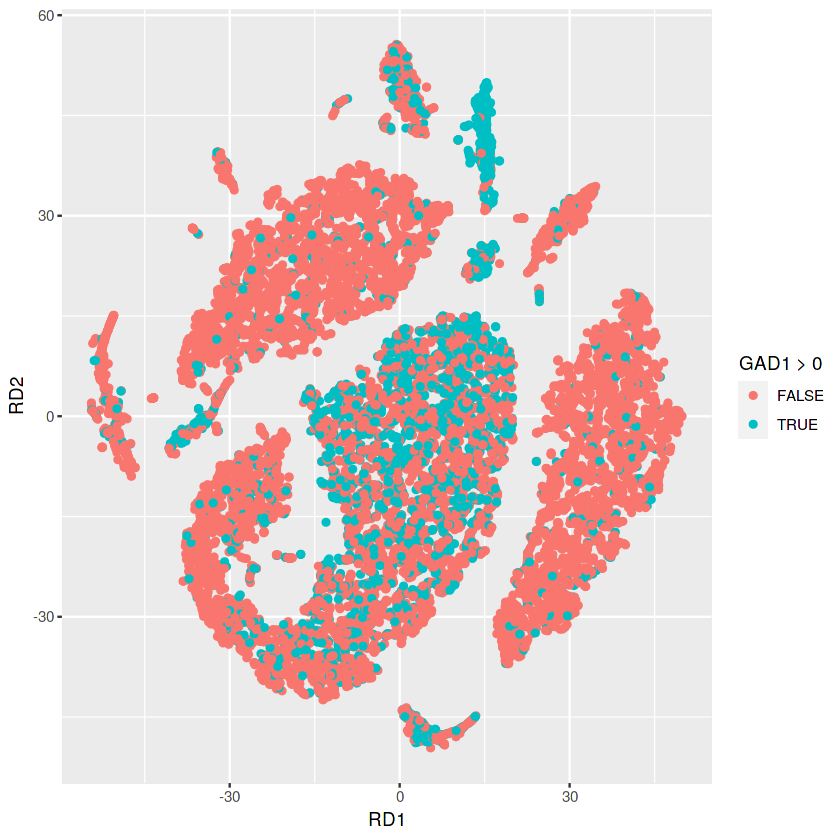

In [29]:
library(ggplot2)
PBMC_DR$GAD1 = sc1$toc["GAD1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD1 > 0))
plot(gg)

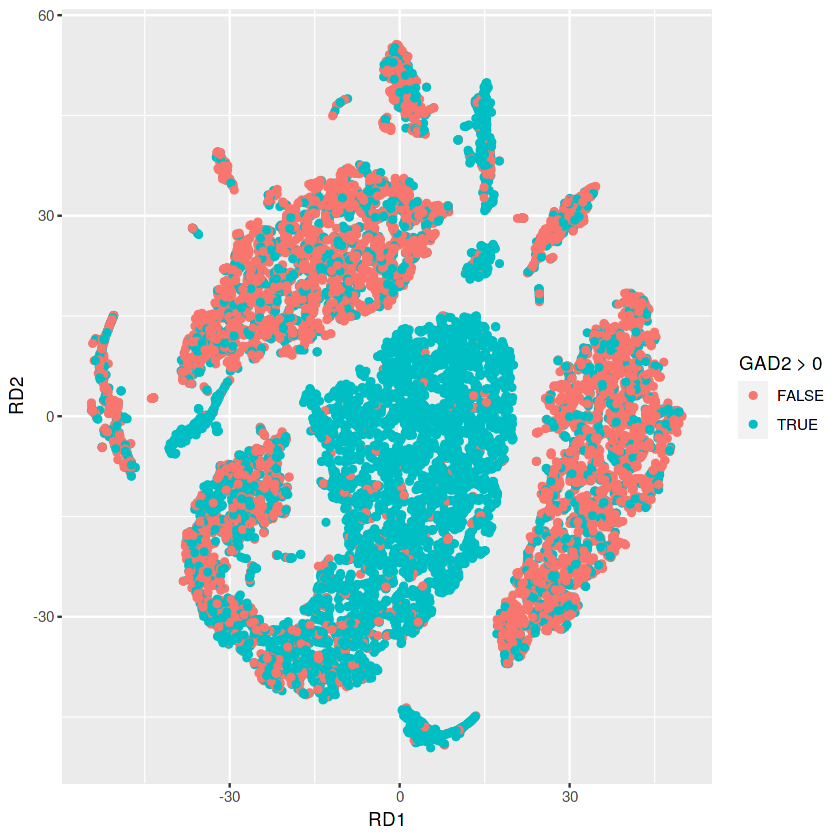

In [30]:
library(ggplot2)
PBMC_DR$GAD2 = sc1$toc["GAD2", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD2 > 0))
plot(gg)

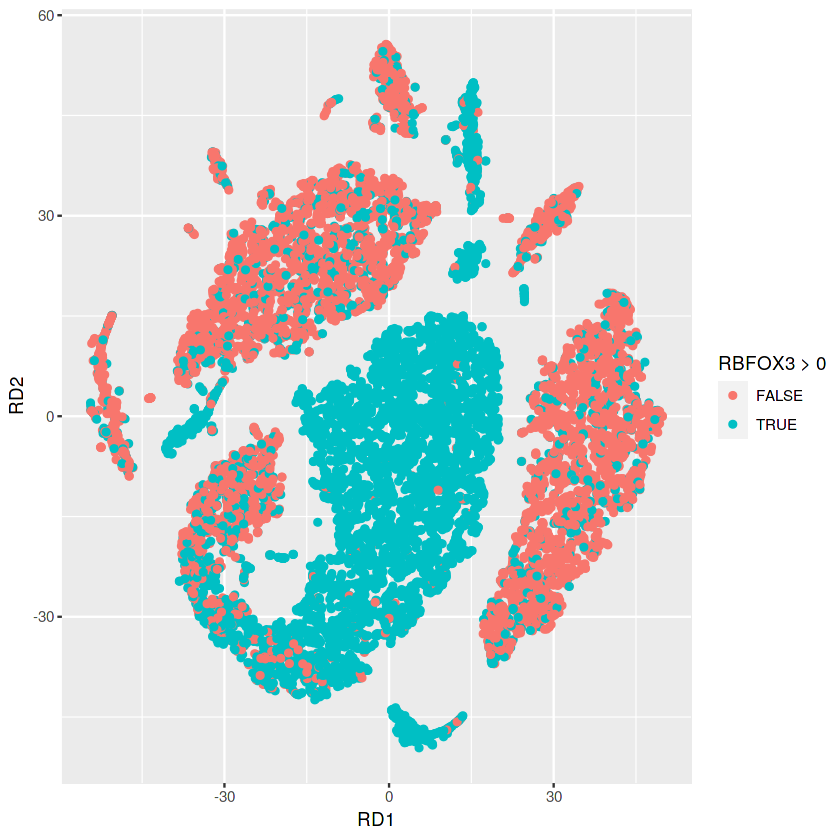

In [31]:
library(ggplot2)
PBMC_DR$RBFOX3 = sc1$toc["RBFOX3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = RBFOX3 > 0))
plot(gg)

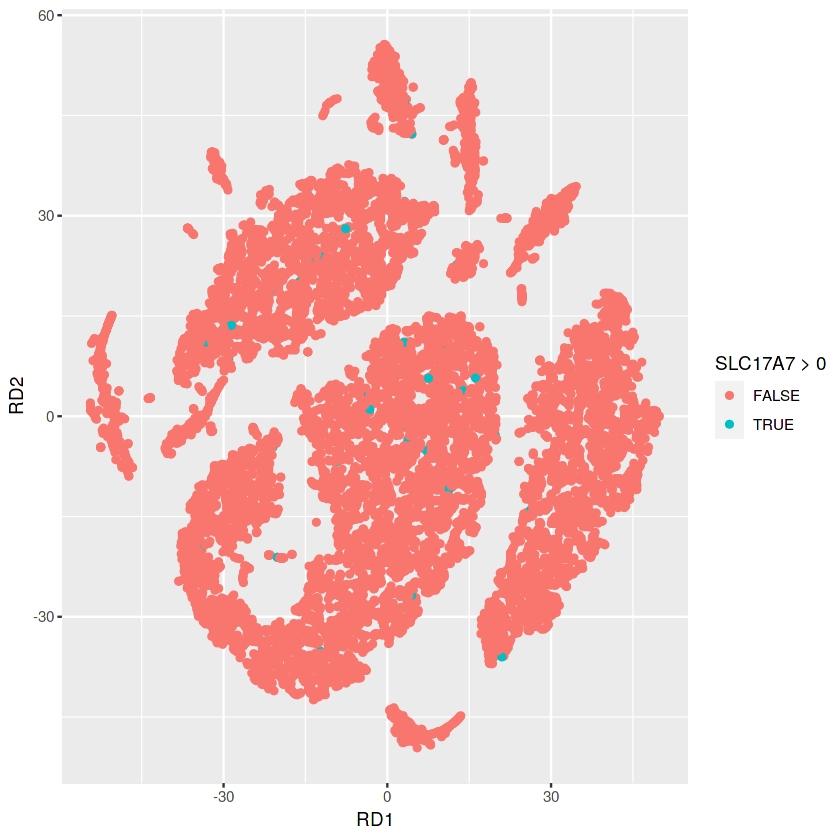

In [32]:
library(ggplot2)
PBMC_DR$SLC17A7 = sc1$toc["SLC17A7", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = SLC17A7 > 0))
plot(gg)

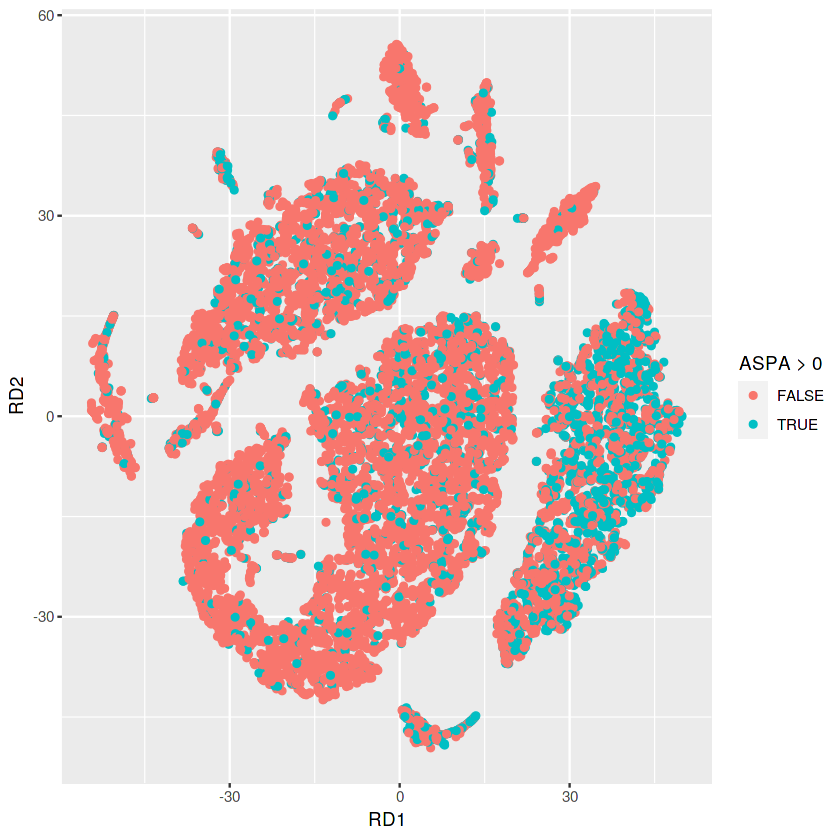

In [33]:
library(ggplot2)
PBMC_DR$ASPA = sc1$toc["ASPA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ASPA > 0))
plot(gg)

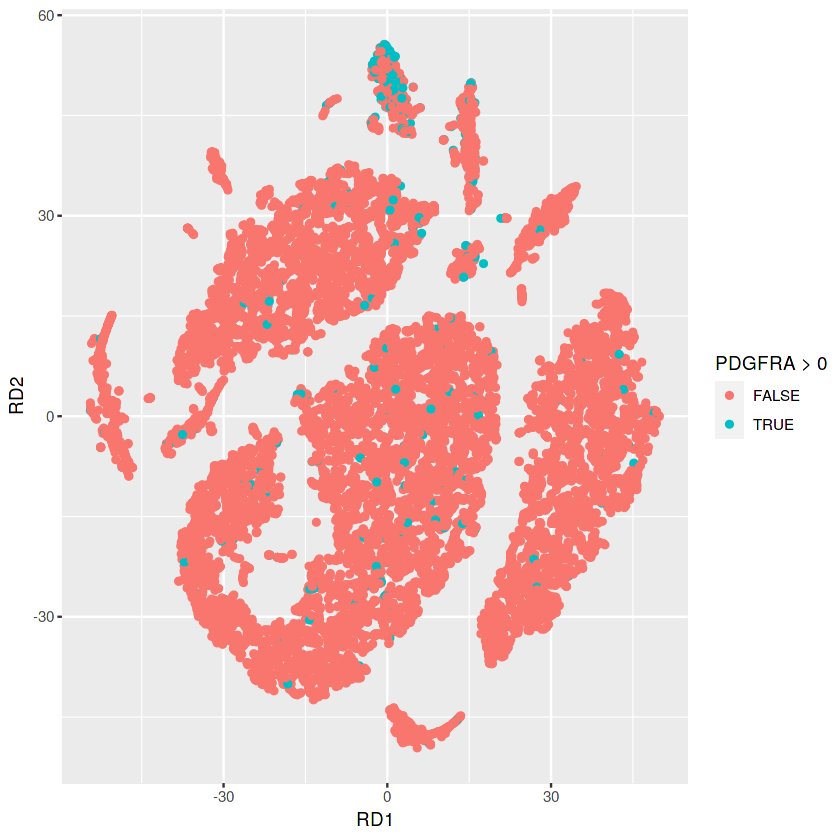

In [34]:
library(ggplot2)
PBMC_DR$PDGFRA = sc1$toc["PDGFRA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = PDGFRA > 0))
plot(gg)

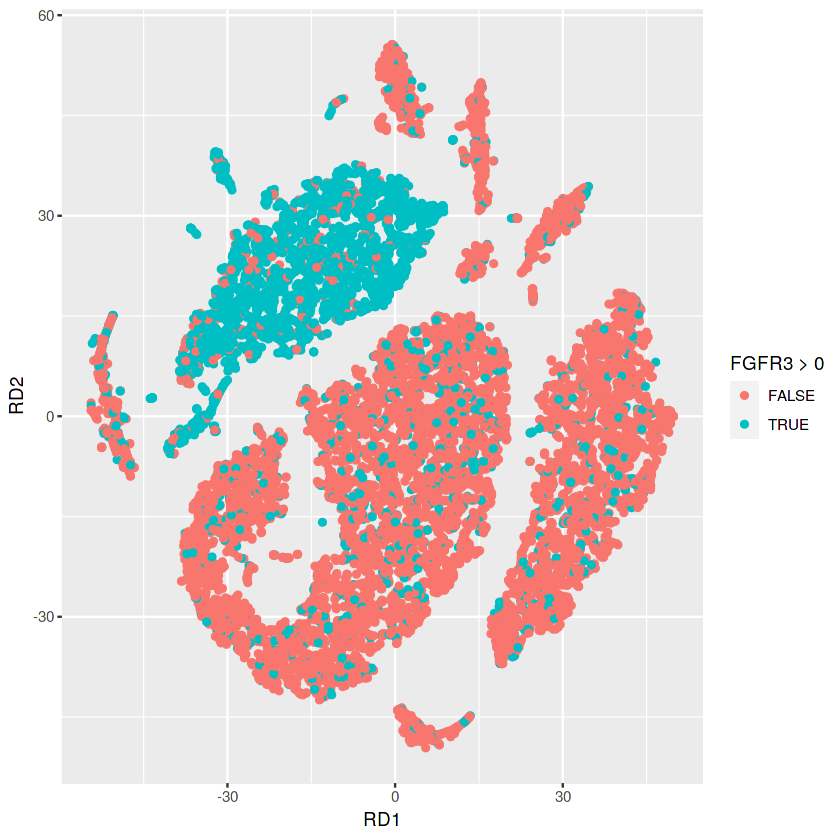

In [35]:
library(ggplot2)
PBMC_DR$FGFR3 = sc1$toc["FGFR3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = FGFR3 > 0))
plot(gg)

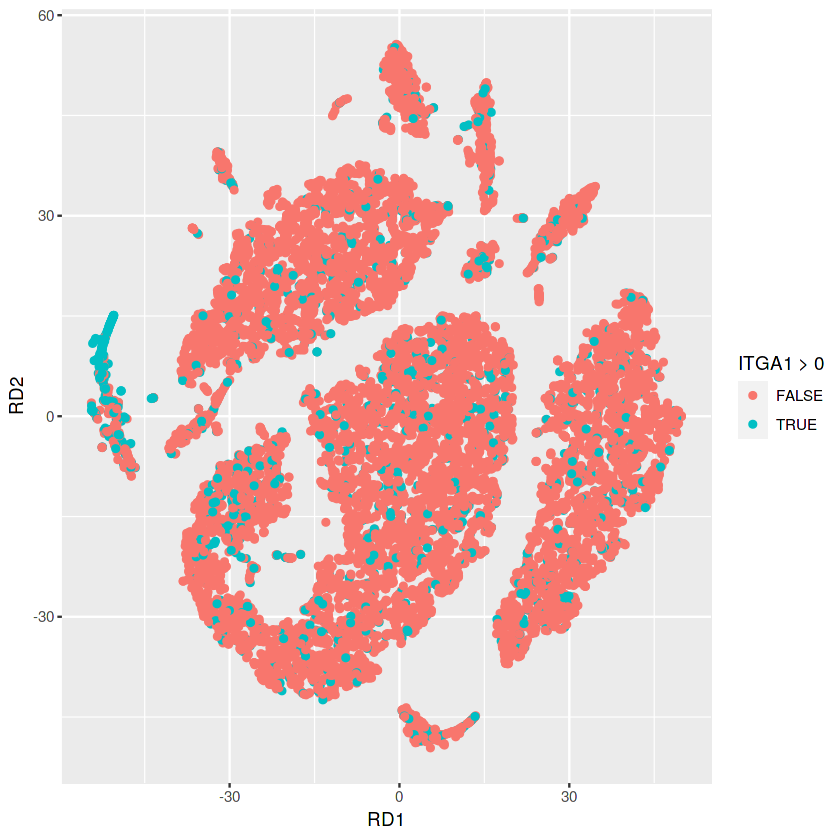

In [36]:
library(ggplot2)
PBMC_DR$ITGA1 = sc1$toc["ITGA1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ITGA1 > 0))
plot(gg)

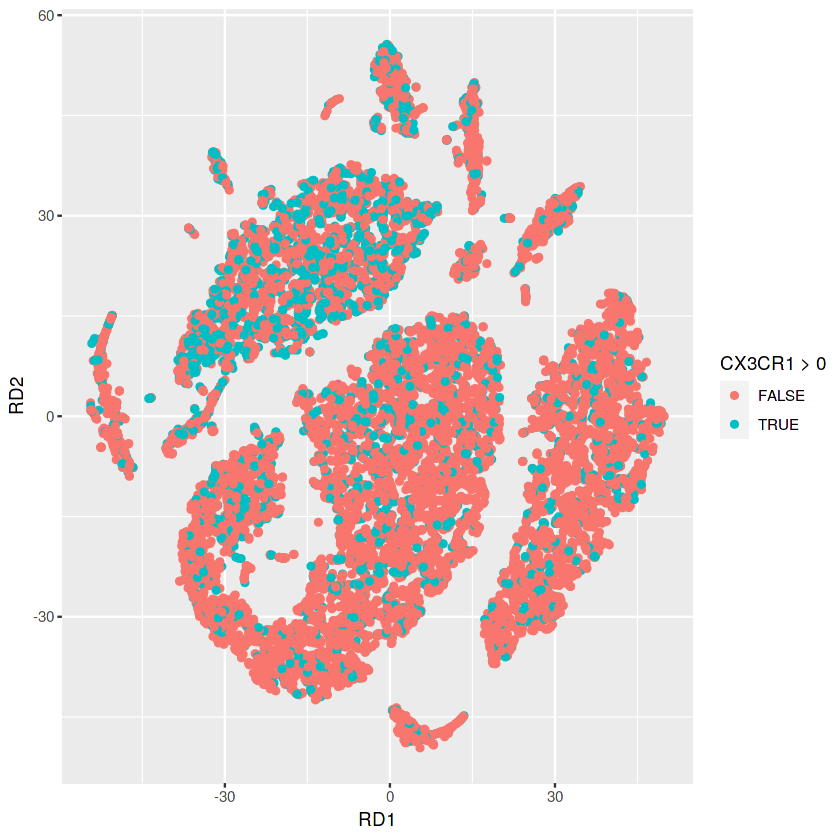

In [37]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["GFAP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

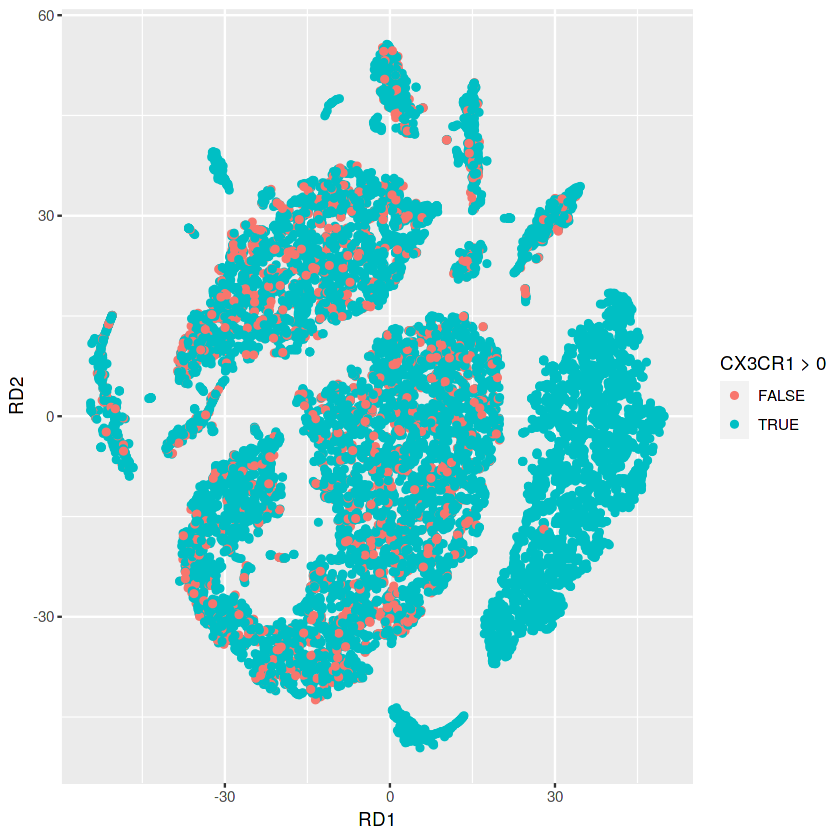

In [38]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["MBP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

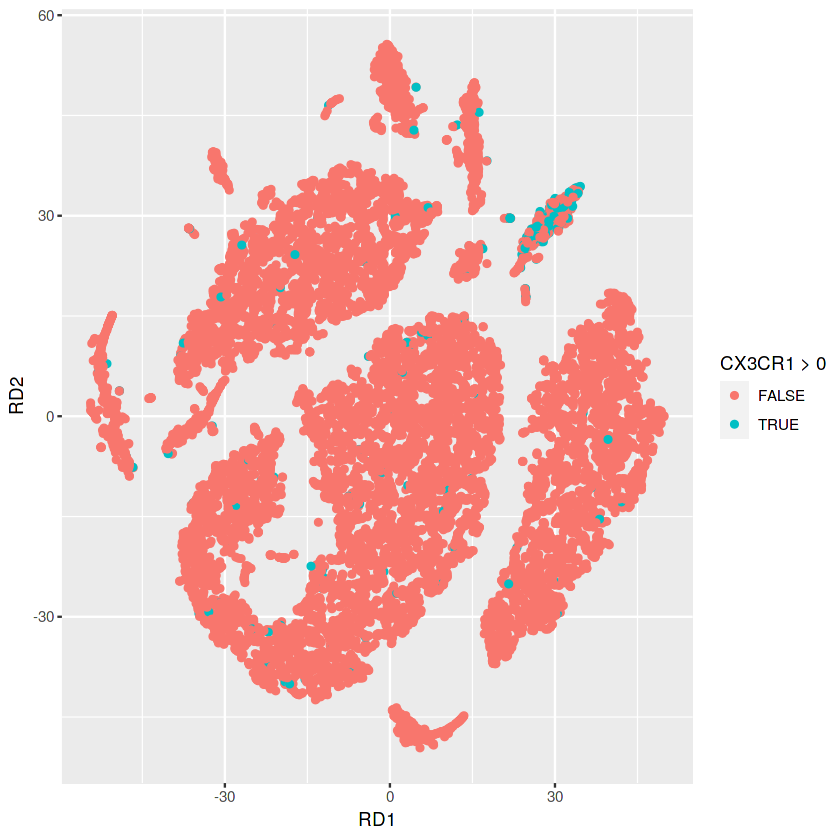

In [39]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["CX3CR1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

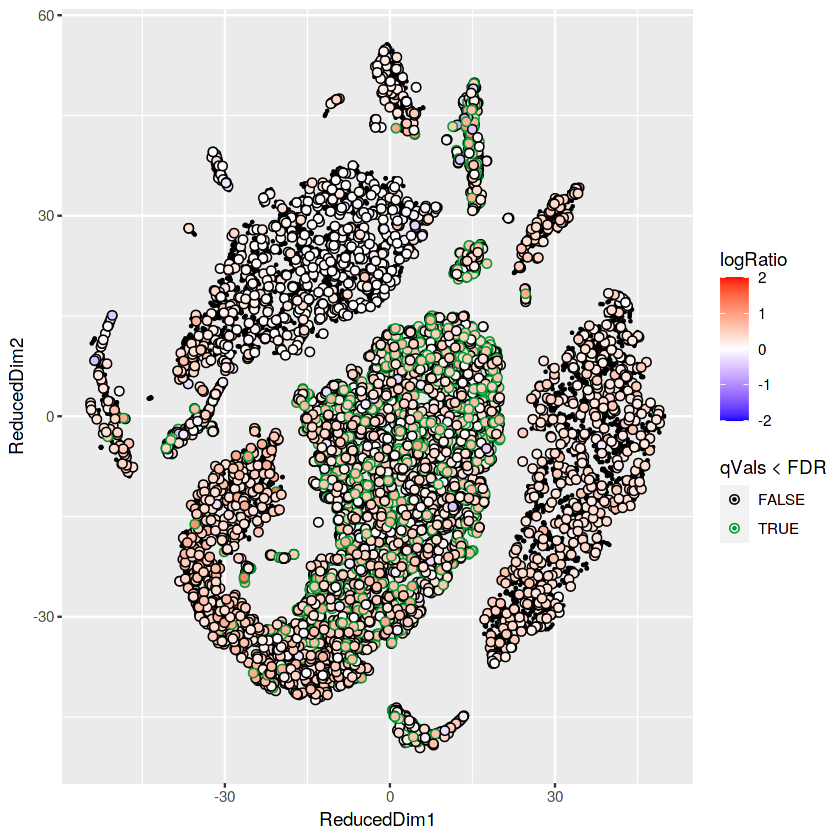

In [40]:
gg = plotMarkerMap(sc1, "RBFOX3", PBMC_DR)
plot(gg)

In [41]:
sc1 = setDR(sc1, PBMC_DR)

Warning message in setDR(sc1, PBMC_DR):
“DR has 12 columns where 2 were expected.  Using first two.”


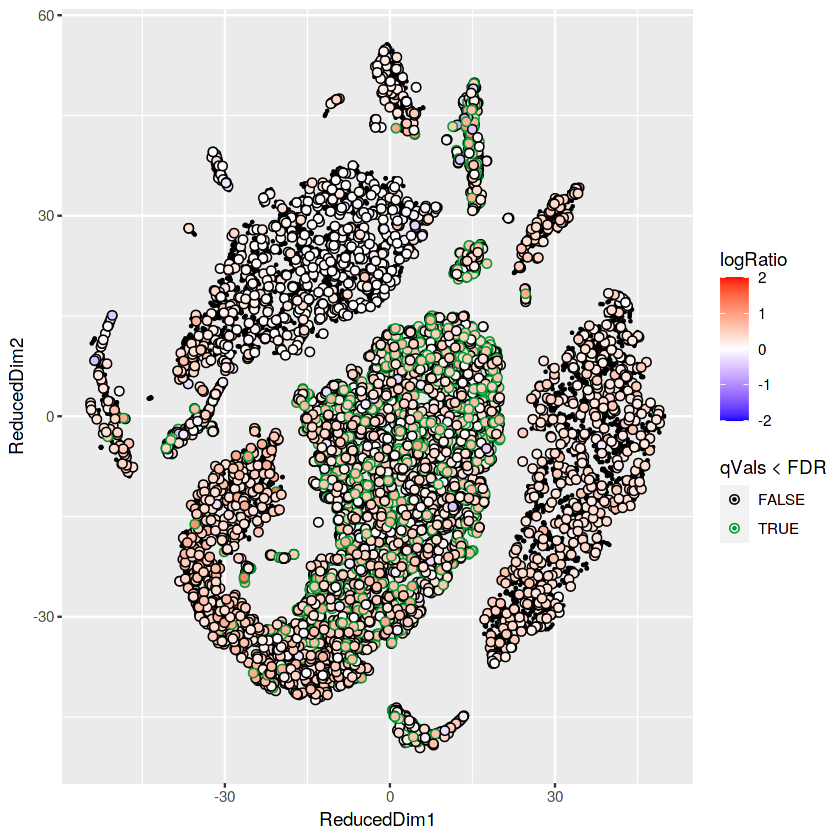

In [42]:
gg = plotMarkerMap(sc1, "RBFOX3")
plot(gg)

In [43]:
sc1 = setContaminationFraction(sc1, 0.2)

In [44]:
head(sc1$soupProfile[order(sc1$soupProfile$est, decreasing = TRUE), ], n = 20)

est         counts
MALAT1     0.041051892 495636
RBFOX1     0.008311907 100353
AC120193.1 0.007401311  89359
PHACTR1    0.007350786  88749
PCDH9      0.005952755  71870
NRXN3      0.004738681  57212
GPC5       0.004733297  57147
DGKB       0.004643513  56063
ROBO2      0.004413503  53286
CADM2      0.003715357  44857
PDE10A     0.003672701  44342
PLCB1      0.003320439  40089
DLG2       0.003112462  37578
ANKS1B     0.003014478  36395
NRXN1      0.002909453  35127
SNHG14     0.002899680  35009
ADGRB3     0.002879636  34767
NLGN1      0.002656501  32073
LSAMP      0.002593884  31317
FGF14      0.002593304  31310

In [45]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

No gene lists provided, attempting to find and plot cluster marker genes.

Found 1667 marker genes

Warning message:
“Removed 184025 rows containing non-finite values (stat_ydensity).”


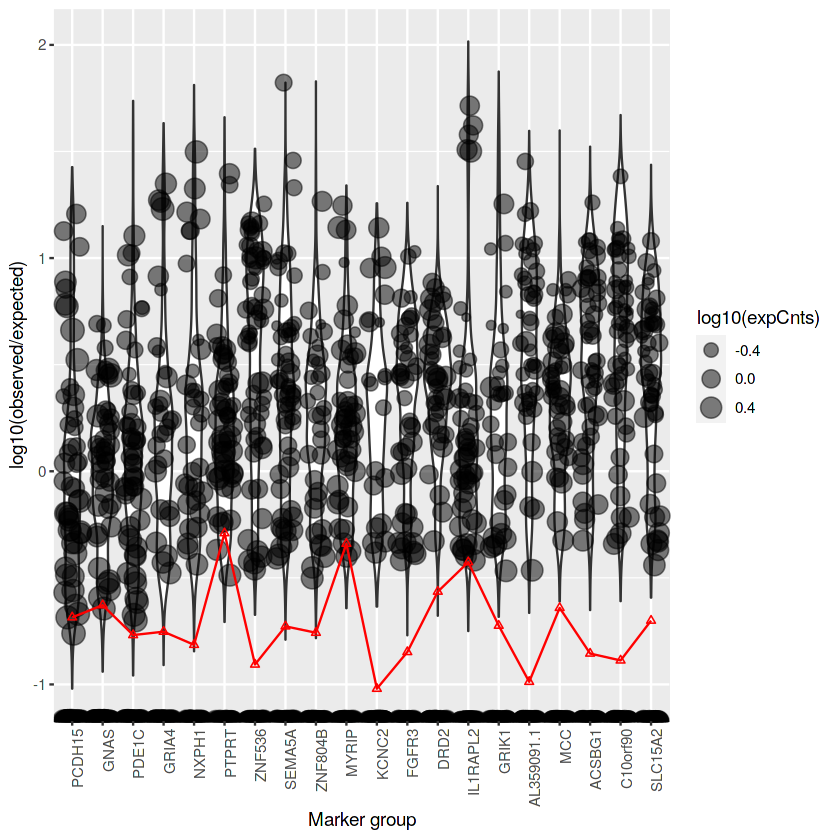

In [46]:
plotMarkerDistribution(sc1)

In [54]:
#str(sc1)

In [45]:
#sc1 = inferNonExpressedGenes(sc1)
##Error in inferNonExpressedGenes(sc1): could not find function "inferNonExpressedGenes"
##Traceback:

In [47]:
igGenes = c("PCDH15","GNAS","PDE1C","GRIA4","NXPH1","PTPRT","ZNF536","SEMA5A","ZNF804B","MYRIP","KCNC2","FGFR3","DRD2","IL1RAPL2","GRIK1","AL359091.1","MCC","ACSBG1","C10orf90","SLC15A2")



In [48]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes))

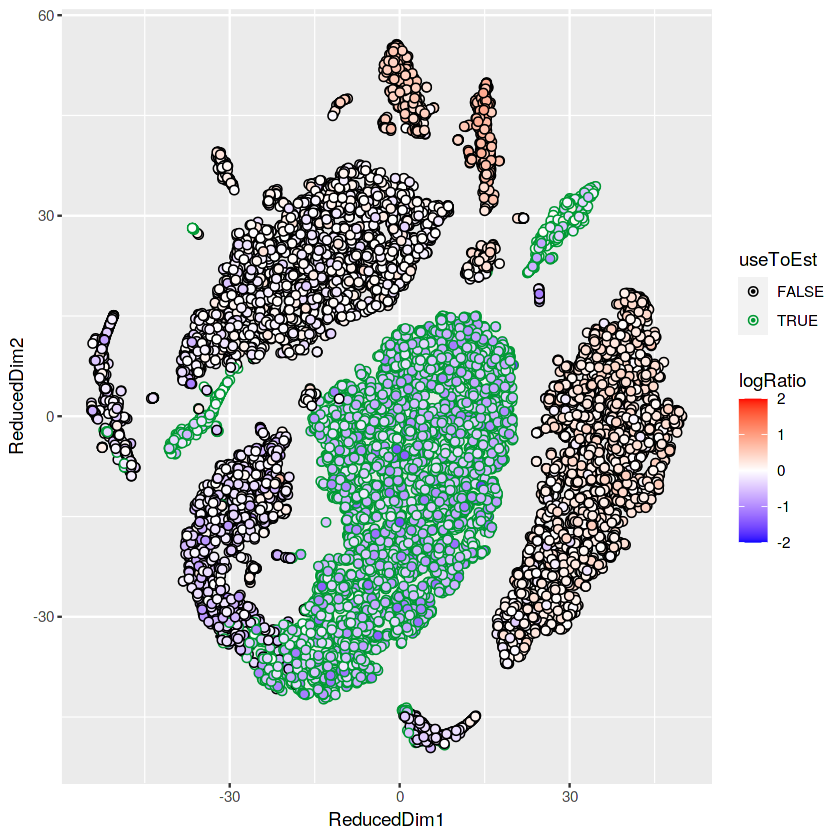

In [49]:
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

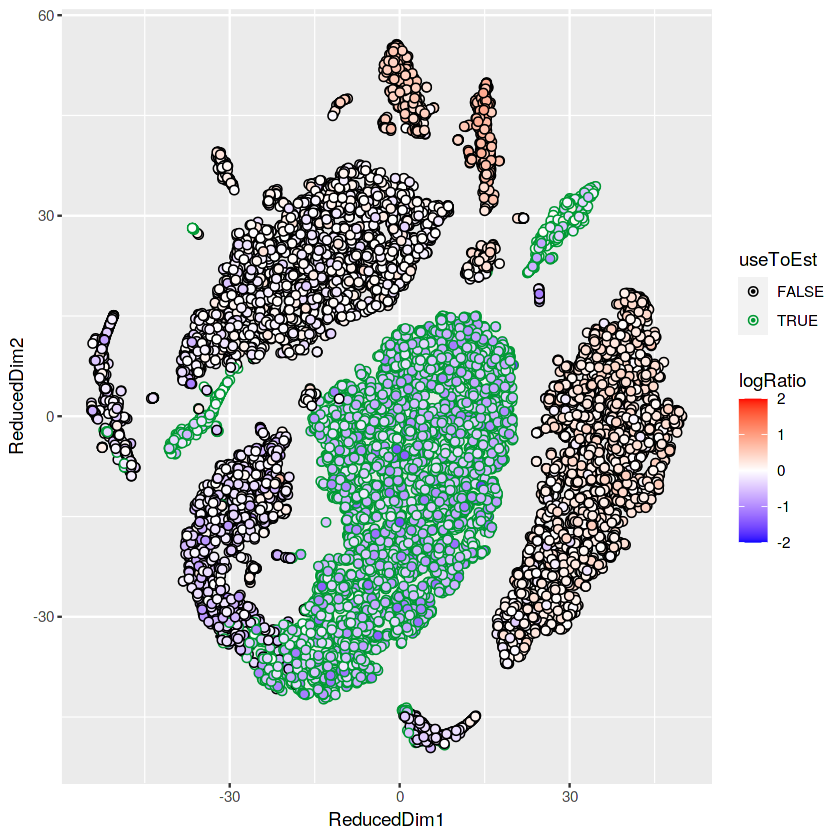

In [50]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes), 
    clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

In [51]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

In [52]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst)

Estimated global contamination fraction of 27.19%



In [53]:
head(sc1$metaData)

nUMIs RD1        RD2           rho       clusters rhoLow   
AAACCCAAGCTAGCCC-1  4113 -23.293344 -38.366844819 0.2718985 2        0.2694176
AAACCCAAGGATTTCC-1  7894  21.678622  29.630708197 0.2718985 22       0.2694176
AAACCCAAGGTCATAA-1 10274  12.443978 -45.689870225 0.2718985 11       0.2694176
AAACCCACAAGCAATA-1 24838 -32.205339  -2.315750780 0.2718985 10       0.2694176
AAACCCACACTCAAGT-1 20996   3.277439  -0.009901182 0.2718985 2        0.2694176
AAACCCACAGCACAAG-1  7479  -9.651963  28.063577324 0.2718985 1        0.2694176
                   rhoHigh  
AAACCCAAGCTAGCCC-1 0.2743945
AAACCCAAGGATTTCC-1 0.2743945
AAACCCAAGGTCATAA-1 0.2743945
AAACCCACAAGCAATA-1 0.2743945
AAACCCACACTCAAGT-1 0.2743945
AAACCCACAGCACAAG-1 0.2743945

In [54]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, 
    cellSpecificEstimates = TRUE)
quantile(sc1$metaData$rho)

ERROR: Error in calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, : unused argument (cellSpecificEstimates = TRUE)


In [55]:
##Manual alternative
#sc = setContaminationFraction(sc, 0.1)

In [56]:
out = adjustCounts(sc1, clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))

Expanding counts from 24 clusters to 12994 cells.



In [57]:
library(Matrix)
cntSoggy = rowSums(sc1$toc > 0)
cntStrained = rowSums(out > 0)
mostZeroed = tail(sort((cntSoggy - cntStrained)/cntSoggy), n = 10)
mostZeroed

AP002512.3    SCGB1D1  RN7SL330P   LHX5-AS1 AC114546.3 AC037433.1 AC127459.3 
         1          1          1          1          1          1          1 
AC002347.2    ADCYAP1 AC104985.1 
         1          1          1

In [58]:
tail(sort(rowSums(sc1$toc > out)/rowSums(sc1$toc > 0)), n = 20)

COL18A1-AS1     SLC19A1   LINC01694       PCBP3  AL133492.1  AJ011931.2 
          1           1           1           1           1           1 
     COL6A1      COL6A2     SPATC1L         LSS  AP001469.1  MCM3AP-AS1 
          1           1           1           1           1           1 
     MCM3AP        YBEY    C21orf58        PCNT    RPL18AP2       DIP2A 
          1           1           1           1           1           1 
      S100B       PRMT2 
          1           1

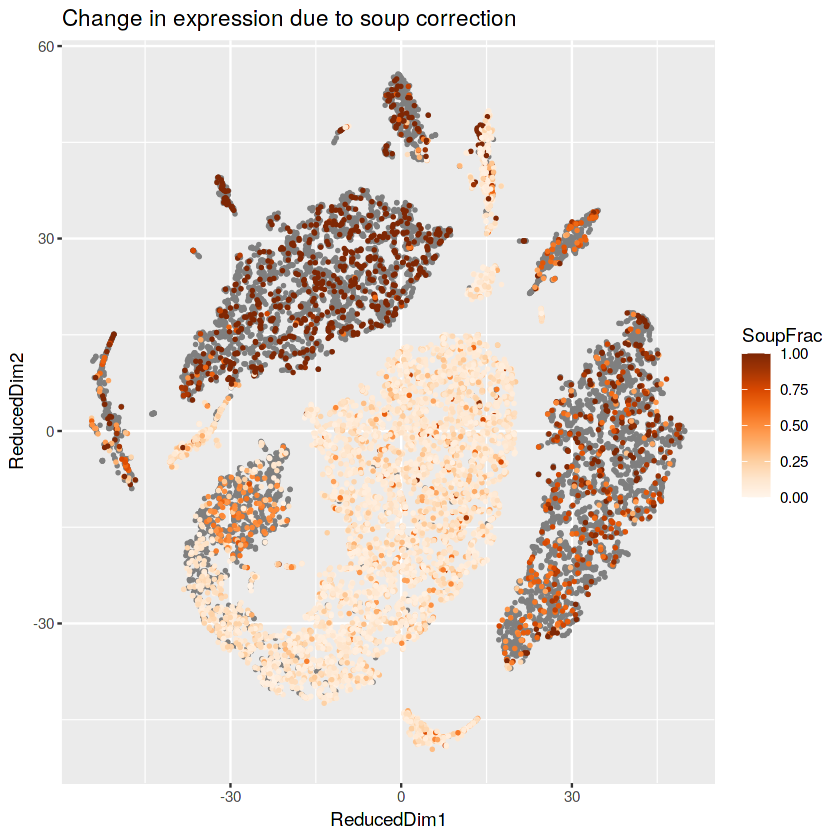

In [59]:
plotChangeMap(sc1, out, "RBFOX3")

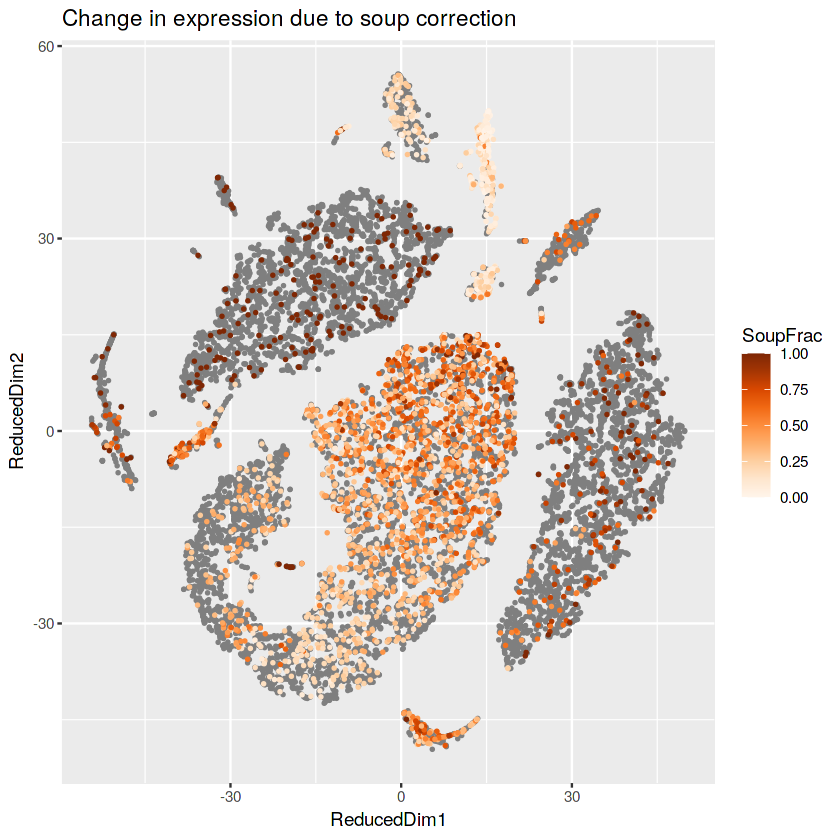

In [60]:
plotChangeMap(sc1, out, "GAD1")

In [61]:
DropletUtils:::write10xCounts("./strainedCounts_putamen_6", out)